# Explorative Data Analysis of Netflix Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('netflix_titles.csv')
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format="%B %d, %Y")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


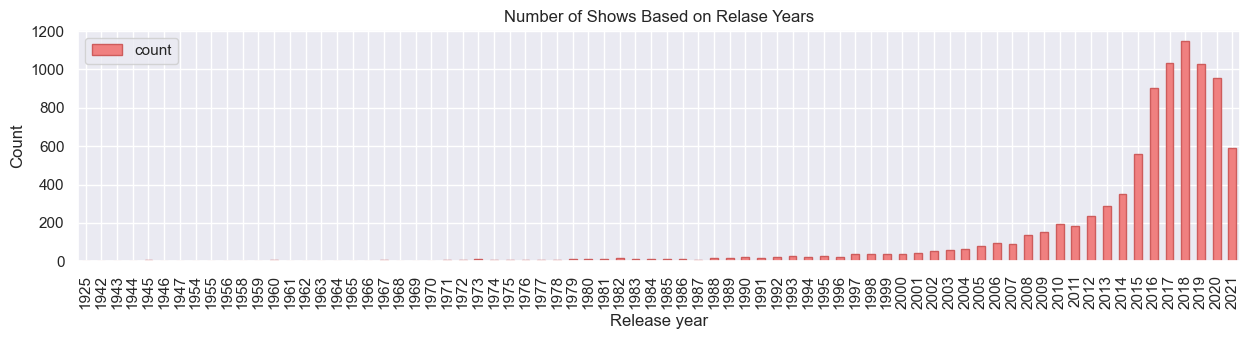

In [4]:
num_of_shows_from_each_year = df['release_year'].value_counts(ascending=True).reset_index()
num_of_shows_from_each_year = num_of_shows_from_each_year.sort_values(by='release_year', ascending=True).reset_index(drop=True)
num_of_shows_from_each_year.plot(x='release_year', \
                                 kind='bar', 
                                 figsize=(15, 3), 
                                 color='lightcoral', 
                                 edgecolor='indianred')
plt.title('Number of Shows Based on Relase Years')
plt.xlabel('Release year')
plt.ylabel('Count')
plt.show()

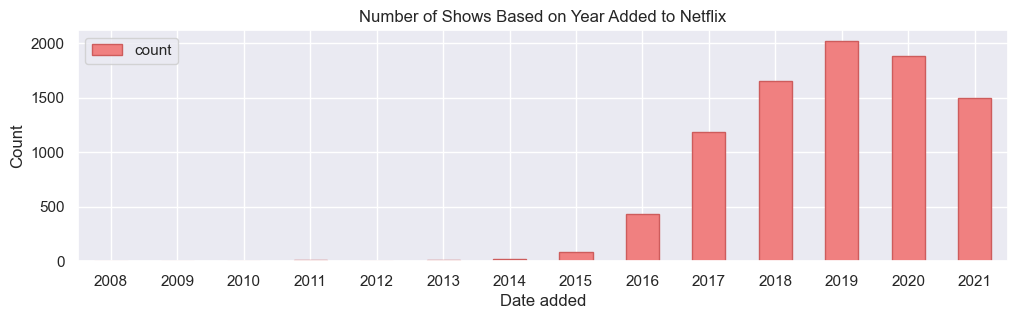

In [5]:
num_of_shows_added_each_year= df['date_added'].dropna()
num_of_shows_added_each_year = num_of_shows_added_each_year.dt.strftime('%Y')


num_of_shows_added_each_year = num_of_shows_added_each_year.value_counts(ascending=True).reset_index()
num_of_shows_added_each_year = num_of_shows_added_each_year.sort_values(by='date_added', ascending=True).reset_index(drop=True)
num_of_shows_added_each_year.plot(x='date_added', 
                                  kind='bar', 
                                  figsize=(12, 3), 
                                  color='lightcoral', 
                                  edgecolor='indianred',
                                  rot=0)
plt.title("Number of Shows Based on Year Added to Netflix")
plt.xlabel("Date added")
plt.ylabel("Count")
plt.show()

In [26]:
month_added = df['date_added'].dt.month.fillna(0)
day_added = df['date_added'].dt.day.dropna()

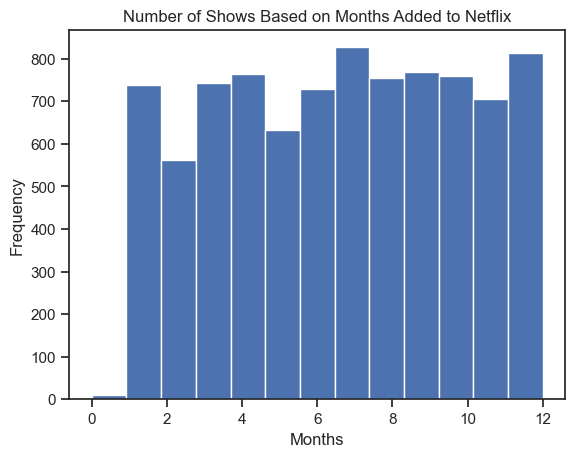

In [27]:
month_added.plot(kind='hist', bins=13, title='Number of Shows Based on Months Added to Netflix', xlabel='Months')
plt.show()

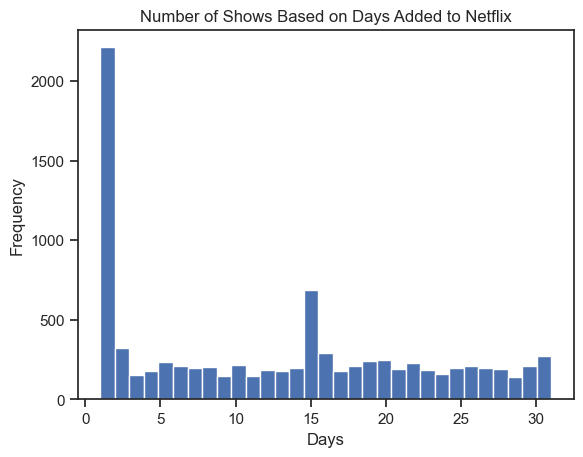

In [28]:
day_added.plot(kind='hist', bins=31, title='Number of Shows Based on Days Added to Netflix', xlabel='Days')
plt.show()

### Movies / TV Shows

In [8]:
# df['duration'].unique()

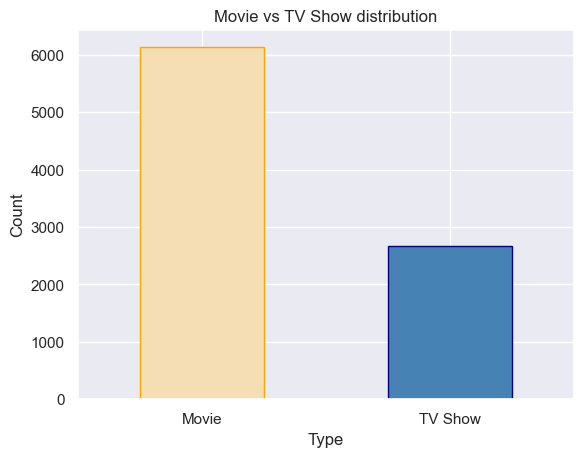

In [9]:
df['type'].value_counts().plot(kind='bar', 
                               color=['wheat', 'steelblue'], 
                               edgecolor=['orange', 'navy'],
                               rot=0, 
                               title='Movie vs TV Show distribution', 
                               xlabel='Type', 
                               ylabel='Count')
plt.show()

In [10]:
duration = df['duration']
duration = duration.dropna()
duration = duration.astype(str)

tv_shows = duration[duration.str.contains('Season')]
movies = duration[duration.str.contains('min')]

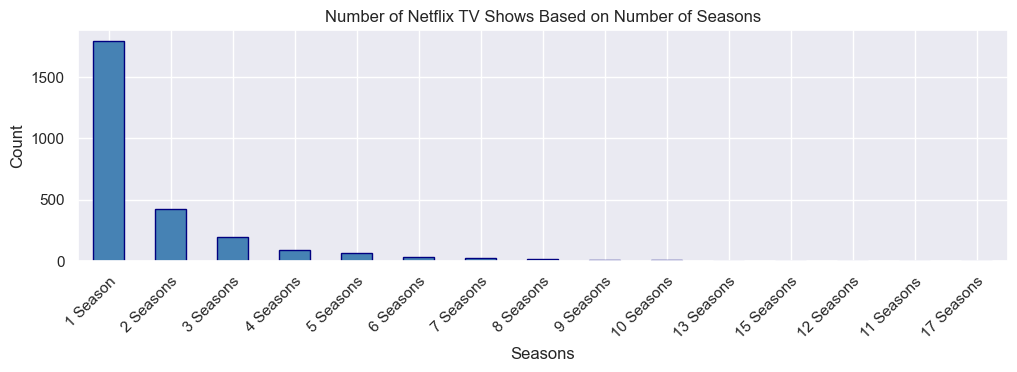

In [11]:
tv_shows.value_counts().plot(kind='bar', figsize=(12, 3), color='steelblue', edgecolor='navy')
plt.title('Number of Netflix TV Shows Based on Number of Seasons')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.xticks(ha='right', rotation=45, rotation_mode="anchor")
plt.show()

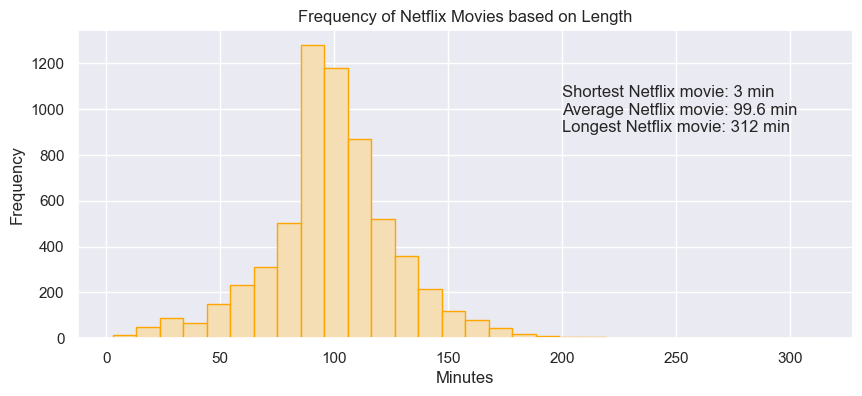

In [12]:
movies_grouped = movies.str.replace(' min', '').astype(int)
movies_grouped.plot(kind='hist', bins=30, figsize=(10, 4), color='wheat', edgecolor='orange')

plt.annotate(f'Shortest Netflix movie: {movies_grouped.min()} min\nAverage Netflix movie: {movies_grouped.mean().round(1)} min\nLongest Netflix movie: {movies_grouped.max()} min',
            xy=(200, 900))

plt.title('Frequency of Netflix Movies based on Length')
plt.xlabel('Minutes')
plt.show()

## Countries

In [13]:
df['country'].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

#### Problem:
In the 'country' column, each observation (Netflix show) may list multiple countries (Romania, Bulgaria, Hungary). To accurately credit every country involved, we need to clean the data.

In [14]:
country_count = df.copy()
country_count = pd.concat([country_count, df['country'].str.split(",", expand=True)], axis=1)
country_count = country_count.melt(id_vars=['type', 'title'], value_vars=range(12), value_name='Country')
country_count = country_count.drop(columns=['variable'])
country_count = country_count[country_count['Country'].notna()]
country_count['Country'] = country_count['Country'].str.strip()
country_count

,type,title,Country
0,Movie,Dick Johnson Is Dead,United States
1,TV Show,Blood & Water,South Africa
4,TV Show,Kota Factory,India
7,Movie,Sankofa,United States
8,TV Show,The Great British Baking Show,United Kingdom
...,...,...,...
78859,Movie,The Look of Silence,Germany
85496,Movie,Barbecue,Sweden
87666,Movie,The Look of Silence,Netherlands
94303,Movie,Barbecue,United States


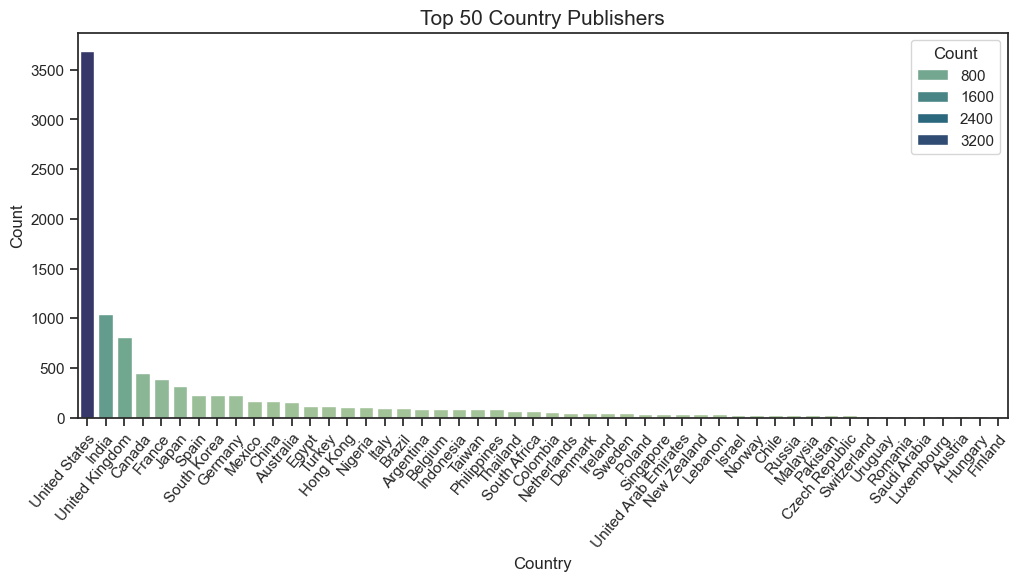

In [15]:
sns.set_style("ticks")
top_10_countries = country_count['Country'].value_counts().head(50).reset_index()
top_10_countries.columns = ['Country', 'Count']
plt.figure(figsize=(12, 5))
sns.barplot(x='Country', y='Count', data=top_10_countries, palette='crest', hue='Count')
plt.title('Top 50 Country Publishers', fontdict={'fontsize': 15})
plt.xticks(ha='right', rotation=50, rotation_mode="anchor")
plt.xlabel('Country', fontdict={'fontsize': 12})
plt.show()

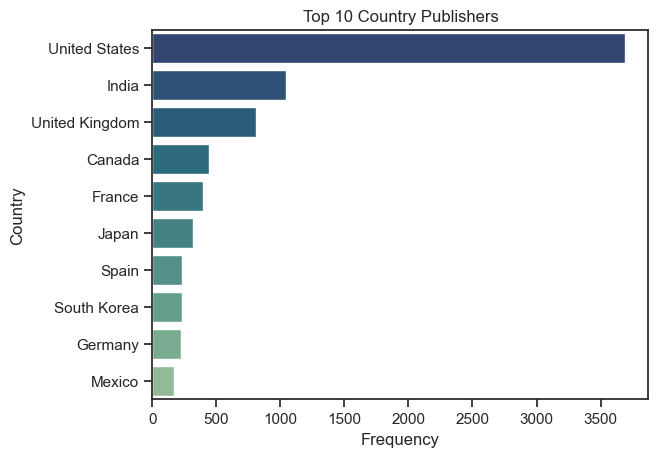

In [16]:
top_10_countries = country_count['Country'].value_counts().head(10).reset_index()
top_10_countries.columns = ['Country', 'Frequency']
sns.barplot(x='Frequency', y='Country', data=top_10_countries, palette='crest_r', hue='Country')
plt.title('Top 10 Country Publishers')
plt.show()